In [2]:
import os
import pandas as pd
from google.cloud import bigquery
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Set environment variable. 
#Note: Adjust path to were you stored your json file
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "viamo-datakind-19b12e3872f5.json"
#No

In [7]:
#Note: adjust paramenters in SQL query according to your needs
query_uganda = "SELECT * FROM `viamo-datakind.datadive.321_sessions_1122` where organization_country='Uganda' LIMIT 10000"

In [8]:
#Pull data from BigQuery and store in pandas DataFrame

Bigquery_client = bigquery.Client()

df_uganda = pd.read_gbq(query_uganda)

In [9]:
df_uganda.shape

(10000, 44)

In [10]:
duplicate = df_uganda[df_uganda.duplicated()]

In [37]:
duplicate.sum().sum() # no dupes in the data

/var/folders/xz/6s1ypdzx5_54gr8yjyqg71z80000gn/T/ipykernel_9170/2813337731.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  duplicate.sum().sum()


0.0

In [36]:
# viewing a random sample of the dataset
df_uganda.sample(n=5, random_state=1)

,call_date,dl_global_created_at,block_interaction_id,call_id,subscriber_id,block_global_created_at,block_entry_at,js_key,tree_version_set_id,call_started,...,phone_type,education_level,income_source,airtime_expense,highest_expense_area,data_usage_consent,new_listener_ever,new_listener_year,new_caller_ever,new_caller_year
9953,2022-09-29,2022-09-29 06:35:22+00:00,1422104913638851332,1422104913533996632,888884848138649600,2022-09-29 06:17:12+00:00,2022-09-29 06:17:12+00:00,block_1568896479947_66,36972,2022-09-29 06:17:12+00:00,...,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>
3850,2022-03-18,2022-03-18 14:21:50+00:00,1351560429318964212,1351559274031480876,1276783077611800368,2022-03-18 14:19:57+00:00,2022-03-18 14:18:37+00:00,block_1626356054193_75,36659,2022-03-18 14:14:01+00:00,...,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>
4962,2022-09-20,2022-09-20 14:07:03+00:00,1418960783538654184,1418960402515494940,1393828609781140828,2022-09-20 14:07:03+00:00,2022-09-20 14:03:33+00:00,block_1585825559967_16,19446,2022-09-20 14:02:02+00:00,...,None,None,None,None,None,None,1393828609781140828,1393828609781140828,<NA>,<NA>
3886,2021-07-04,2021-07-04 13:00:06+00:00,1258406742539636692,1258405555761318692,1258405555673236724,2021-07-04 13:00:06+00:00,2021-07-04 12:59:07+00:00,block_1600348254991_43,24019,2021-07-04 12:54:24+00:00,...,None,None,None,None,None,None,1258405555673236724,<NA>,1258405555673236724,<NA>
5437,2022-10-17,2022-10-17 20:17:21+00:00,1428835521090031252,1428834273540440140,1428344897261799764,2022-10-17 20:02:50+00:00,2022-10-17 20:02:14+00:00,block_1540987272671_56,2567,2022-10-17 19:57:17+00:00,...,None,None,None,None,None,None,<NA>,<NA>,<NA>,<NA>


In [13]:
# filtering object type columns
cat_columns = df_uganda.describe(include=["object"]).columns
cat_columns

Index(['js_key', 'region', 'region_name', 'organization_country',
       'listen_menu_or_digest', 'block_title', 'block_tags', 'block_theme',
       'block_topic', 'age', 'gender', 'location', 'location_level_2',
       'opt_in', 'subscriber_pereferred_language', 'rural_or_urban',
       'phone_type', 'education_level', 'income_source', 'airtime_expense',
       'highest_expense_area', 'data_usage_consent'],
      dtype='object')

In [14]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(df_uganda[i].value_counts())
    print("*" * 50)

Unique values in js_key are :
block_1477742758446_29    1413
block_1568896479947_66    1058
block_1545984239017_51     756
block_1464695840754_80     418
block_1600418307411_94     288
                          ... 
block_1649373711899_85       1
block_1556626866629_39       1
block_1637754040896_55       1
block_1556620145223_30       1
block_1544513113769_32       1
Name: js_key, Length: 795, dtype: int64
**************************************************
Unique values in region are :
EAF    10000
Name: region, dtype: int64
**************************************************
Unique values in region_name are :
East Africa    10000
Name: region_name, dtype: int64
**************************************************
Unique values in organization_country are :
Uganda    10000
Name: organization_country, dtype: int64
**************************************************
Unique values in listen_menu_or_digest are :
Listen Menu      7189
Listen Digest    1009
Name: listen_menu_or_digest, dtype: i

### Observations

* Unique values in gender are : male:387674, female:234668
* By Region - region_central:189141,no_contact:144756,region_eastern:46388
* Famous block topics - srh:27029,coronavirus:25178
* block_theme highest values - health:95267,drama:65822
* Unique values in js_key are -block_1568896479947_66:126274,block_1477742758446_29:125780

In [15]:
df_uganda.skew()

/var/folders/xz/6s1ypdzx5_54gr8yjyqg71z80000gn/T/ipykernel_9170/1520539334.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_uganda.skew()


block_interaction_id           -0.873338
call_id                        -0.873336
subscriber_id                  -0.735827
tree_version_set_id            -0.402256
duration_listened_minutes       3.878657
duration_listened_seconds       3.887720
organization_id                 0.000000
block_audio_percent_listened   -1.987375
km_block_reached               -1.138636
km_block_listened              -1.152679
listener                       -0.682502
registered_demographic_info    -0.856847
rural_or_urban                       NaN
phone_type                           NaN
education_level                      NaN
income_source                        NaN
airtime_expense                      NaN
highest_expense_area                 NaN
data_usage_consent                   NaN
new_listener_ever              -1.972284
new_listener_year              -0.582459
new_caller_ever                -0.689672
new_caller_year                -0.419233
dtype: float64

In [16]:
data_uganda = df_uganda.copy()

In [17]:
data_uganda.shape

(10000, 44)

### Q1- Distribution of calls (unique call ids) over time (day, week, month)


In [20]:
call_start = data_uganda['call_started']
data_uganda['call_date'] = call_start.apply(lambda x: x.date())
data_uganda['call_day'] = call_start.apply(lambda x: x.weekday())
data_uganda['call_week'] = call_start.apply(lambda x: x.date().isocalendar().week)
data_uganda['call_month'] = call_start.apply(lambda x: x.date().month)


In [21]:
data_uganda[['call_date']].value_counts()

call_date 
2022-11-01    68
2022-07-22    65
2022-09-30    61
2022-10-27    59
2022-10-03    55
              ..
2021-03-20     1
2021-09-18     1
2021-06-30     1
2022-01-28     1
2021-11-15     1
Length: 684, dtype: int64

In [22]:
data_uganda[['call_week']].value_counts()

call_week
39           361
40           336
35           326
44           315
24           315
45           311
43           293
31           291
19           281
22           267
26           266
46           262
20           255
42           250
30           245
29           240
41           230
23           230
18           219
14           212
36           207
27           199
33           198
32           198
34           193
9            189
17           183
21           177
12           168
7            167
1            162
15           151
13           150
37           143
16           138
5            137
28           135
38           129
11           126
47           124
8            121
25           118
10           116
49           115
6            109
48            98
2             95
52            87
50            86
3             84
51            84
4             83
53            25
dtype: int64

In [23]:
data_uganda[['call_month']].value_counts()

call_month
10            1249
5             1050
8             1039
11             987
7              971
6              970
9              914
4              690
3              664
2              556
1              486
12             424
dtype: int64

### Q2 - Distribution of number of calls per subscriber (overall, by month)



In [32]:
df_uganda_grp_subscriber = data_uganda.groupby('subscriber_id')

In [35]:
calls_per_sub_month = df_uganda_grp_subscriber['call_month'].value_counts()
calls_per_sub_month

subscriber_id        call_month
570265192890368000   2             1
570292069990400000   12            1
570666042523648000   4             1
570918468321280000   7             1
571303375405056000   5             1
                                  ..
1441103400543977556  11            1
1441115238820218976  11            1
1441142566749211464  11            1
1441321227792158160  11            1
1441352335321729764  11            1
Name: call_month, Length: 9726, dtype: int64

### Q3 - Distribution of time between calls per subscriber by calls

In [ ]:
# this one seems a bit tricky to me
# perhaps a "reduce" is in orderhere to get the average time between calls

### Q4- Frequency of calls by demographic variables (e.g. gender, education)



In [131]:
data_uganda.groupby("gender")["location"].value_counts()

gender  location             
female  region_central            77096
        no_contact                52690
        region_eastern            15818
        region_eastcentral        13627
        region_western             8044
        region_southwestern        4324
        region_northern            4138
        region_nw_westnile         3574
        region_ne_karamoja         1219
        province_toliara              5
        Kumasi                        4
        kampala                       4
        Centre                        2
        province_antananarivo         2
        province_mahajanga            2
male    region_central           108641
        no_contact                88130
        region_eastern            30012
        region_eastcentral        22860
        region_western            18969
        region_southwestern        8465
        region_northern            8458
        region_nw_westnile         8239
        region_ne_karamoja         2224
        pr

In [164]:
df_grouped_loc = data_uganda.sort_values(['location','gender'],ascending=False).groupby(["location","gender"])

In [165]:
df_ed = (
    df_grouped_loc["subscriber_id"]
    .count()
    .to_frame()
    .rename(columns={"subscriber_id": "counts"})
    .reset_index()
)

In [163]:
df_ed

,location,gender,counts
0,Centre,female,2
1,Kumasi,female,4
2,kampala,female,4
3,no_contact,female,52690
4,no_contact,male,88130
5,province_antananarivo,female,2
6,province_antananarivo,male,4
7,province_antsiranana,male,1
8,province_fianarantsoa,male,10
9,province_mahajanga,female,2


/Users/kalyani/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


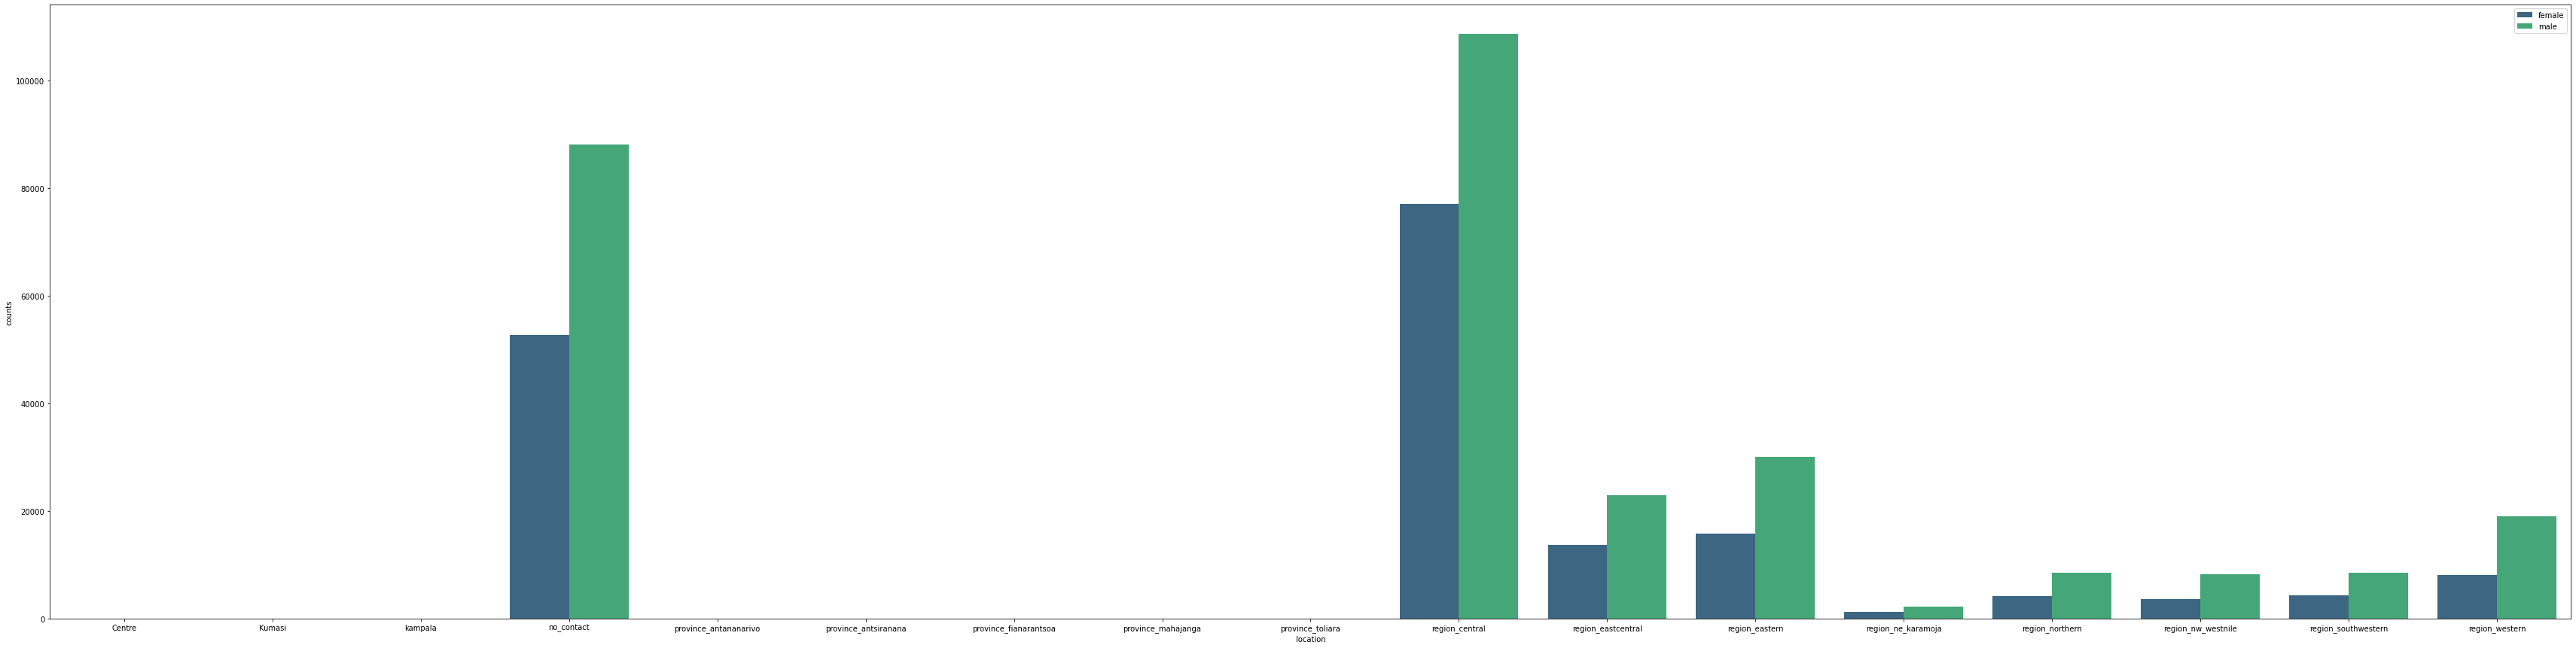

In [166]:
plt.figure(figsize=(60, 15))
sns.barplot(
    df_ed["location"],
    df_ed["counts"],
    hue=df_ed["gender"],
    palette="viridis",
)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [182]:
df_grouped_edulvl_loc= data_uganda.sort_values(['location','education_level'],ascending=False).groupby(["location","education_level"])

In [184]:
df_edulvl = (
    df_grouped_edulvl_loc["subscriber_id"]
    .count()
    .to_frame()
    .rename(columns={"subscriber_id": "counts"})
    .reset_index()
)

In [185]:
df_edulvl

,location,education_level,counts


 ### helper functions

In [18]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()